In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=1


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
import tensorflow as tf
from avgn.utils.paths import DATA_DIR

In [37]:
from avgn.datasets.nsynth import HParams, NSynthDataset

In [38]:
training_tfrecords = list((DATA_DIR / "tensorflow_datasets"/"nsynth").glob('**/*train.tfrecord*'))

In [51]:
hparams = HParams(  
    batch_size = 32,
    win_length = 1024,
    n_fft = 1024,
    hop_length=32,
    ref_level_db = 20,
    min_level_db = -100,
    power = 1, # for spectral inversion
    griffin_lim_iters = 50,
    spectrogram = True,
    #pad=True,
    mel = True,
    mfcc = True,
    mel_matrix_dict = {
        'num_mel_bins': 64,
        'num_spectrogram_bins' : 513,
        'sample_rate' : 16000,
        'lower_edge_hertz':125.0,
        'upper_edge_hertz':3800.0,
    }
)

In [52]:
dset = NSynthDataset([str(i) for i in training_tfrecords], hparams)

W0506 12:48:58.688409 140242526574336 deprecation.py:323] From /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tensorflow/python/ops/signal/dct_ops.py:97: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


In [53]:
exs = iter(dset.dataset_batch)

In [54]:
ex = next(exs)

In [55]:
spec_ex = ex['spectrogram'].numpy()[0]

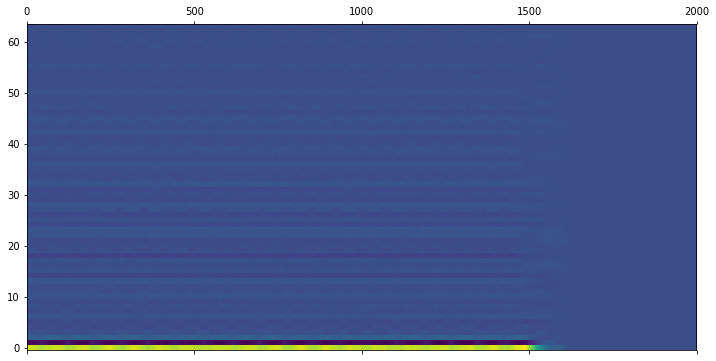

In [56]:
fig, ax = plt.subplots(ncols=1, figsize=(12,6))
ax.matshow(spec_ex.T, aspect='auto', origin='lower')